<a href="https://colab.research.google.com/github/Bemmanuel01/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Price Prediction using Machine Learning in Python**

**Import Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
tesla = pd.read_csv('Tesla.csv')

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
tesla.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [6]:
tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [8]:
tesla.shape

(1692, 7)

**Exploratory Data Analysis (EDA)**

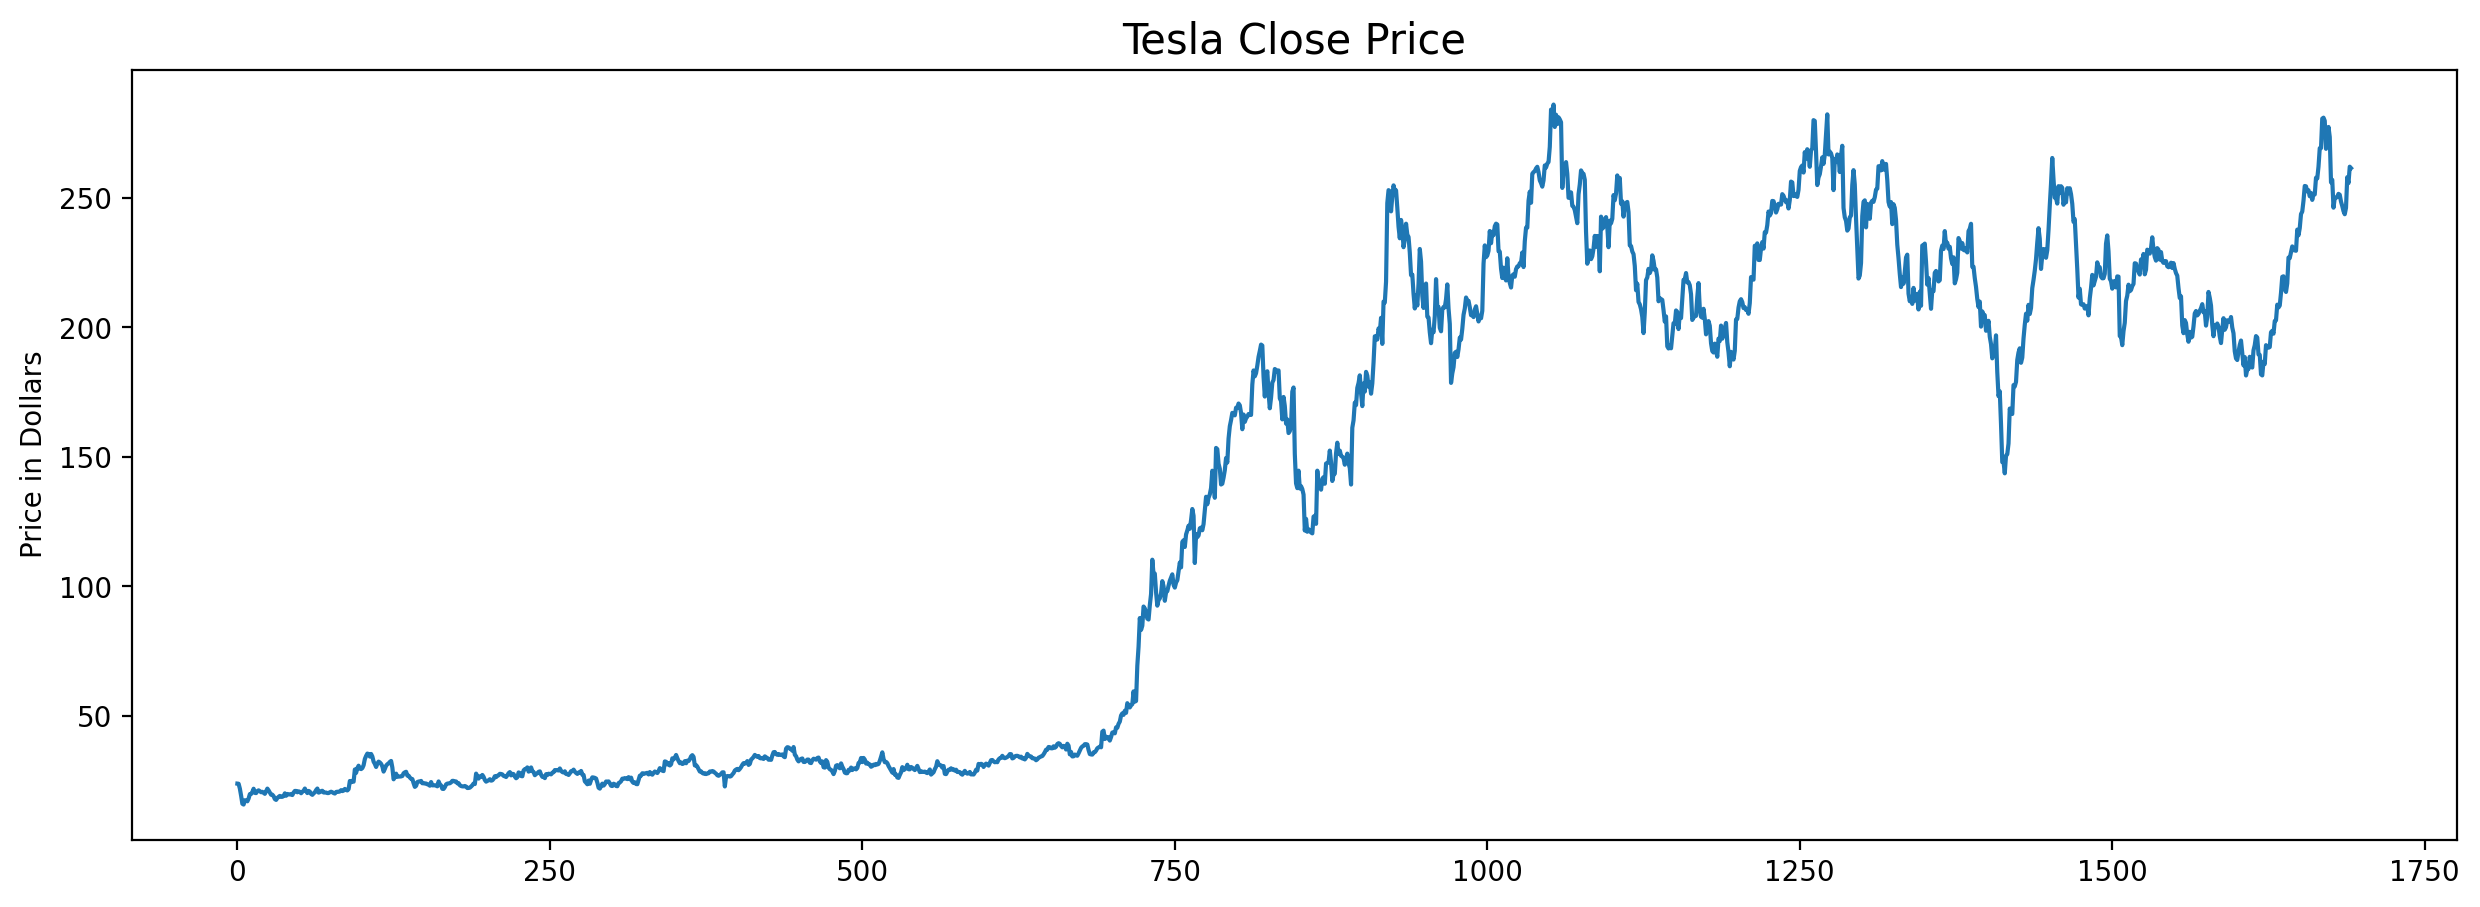

In [13]:
plt.figure(figsize=(15,5), dpi = 200)
plt.plot(tesla['Close'])
plt.title('Tesla Close Price', fontsize=15)
plt.ylabel('Price in Dollars')
plt.show()

**Observation:** The Tesla stock prices are trending upward, as shown by the plot of the closing prices.





In [14]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [15]:
tesla[tesla['Close'] == tesla['Adj Close']].shape

(1692, 7)

**Observation:** We can conclude that the 'Close' and 'Adj Close' columns contain identical data. Since the redundancy doesn’t contribute to the analysis, we will drop the 'Adj Close' column before proceeding further.

In [16]:
tesla = tesla.drop(['Adj Close'], axis=1)

In [17]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


**Distribution for the Continuous Features**

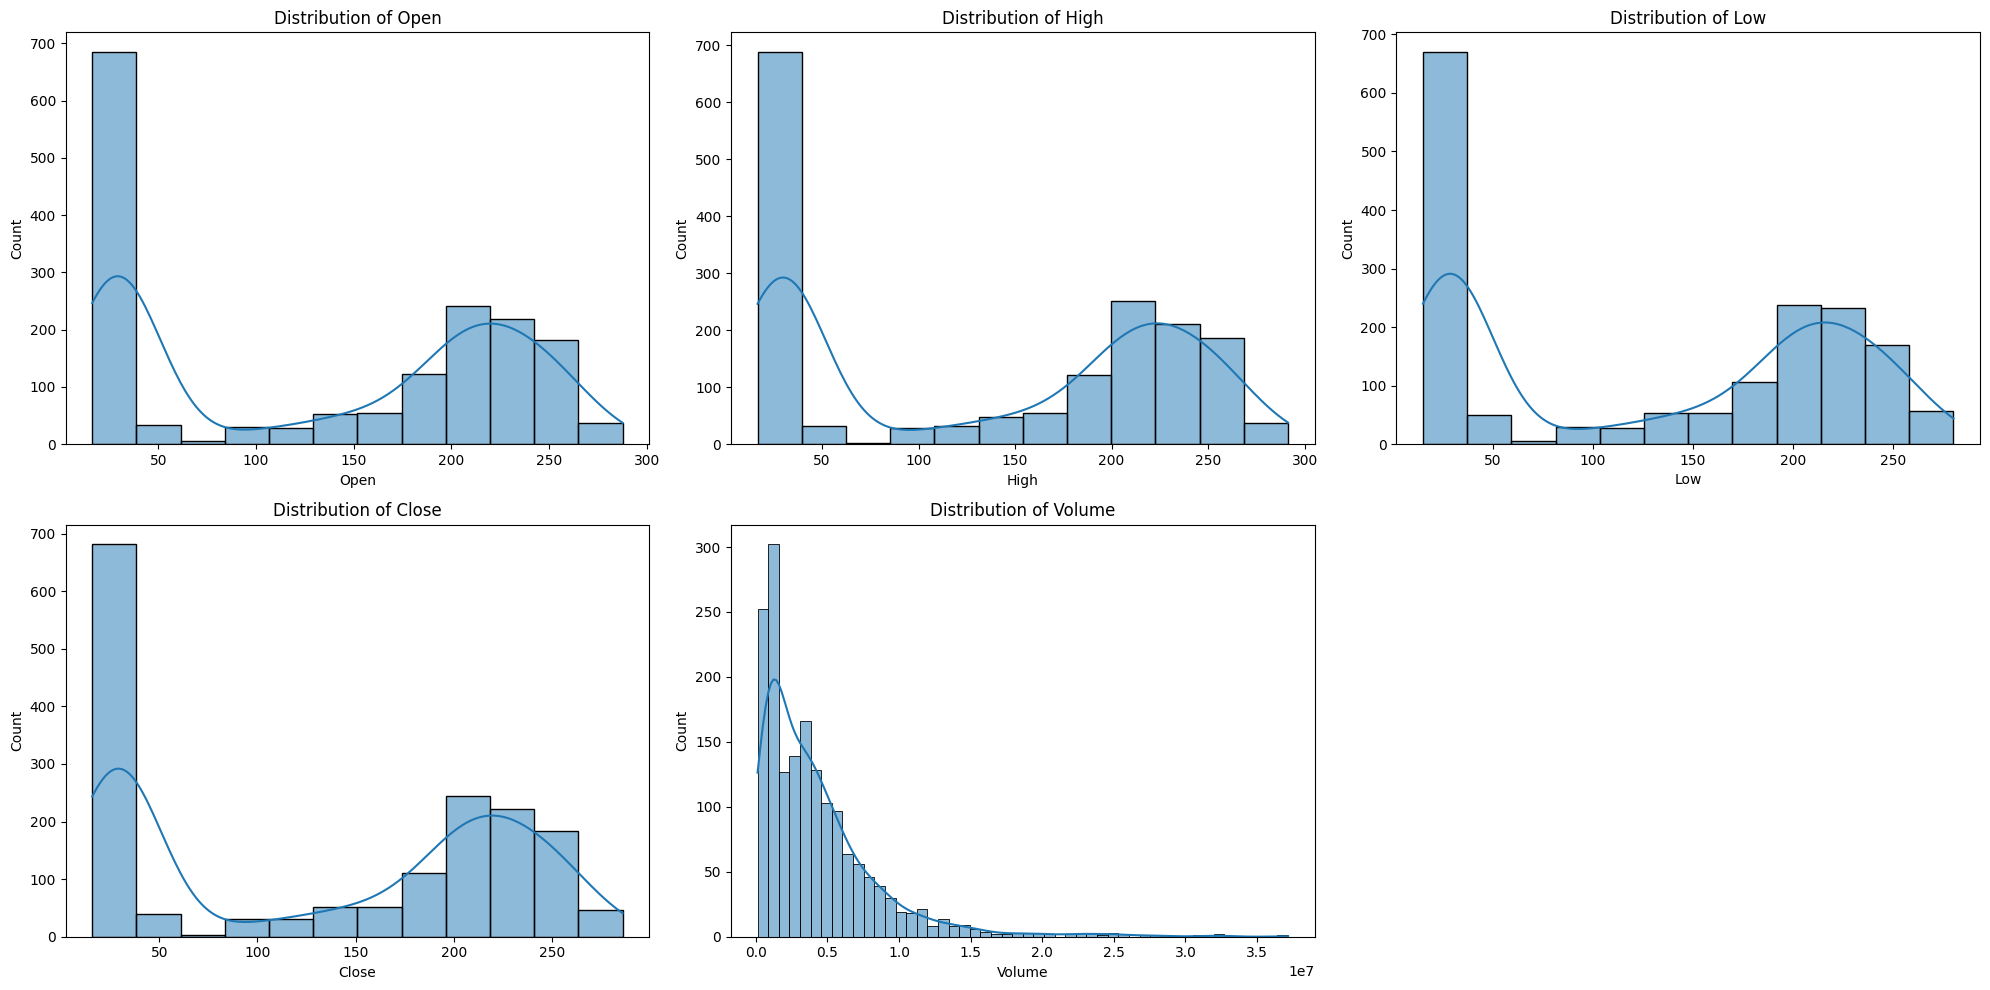

In [18]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(tesla[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Observation:** The distribution plot of the OHLC data shows two distinct peaks, indicating that the data has varied significantly in two separate regions. Meanwhile, the Volume data appears to be left-skewed.

**Boxplot of the Features**

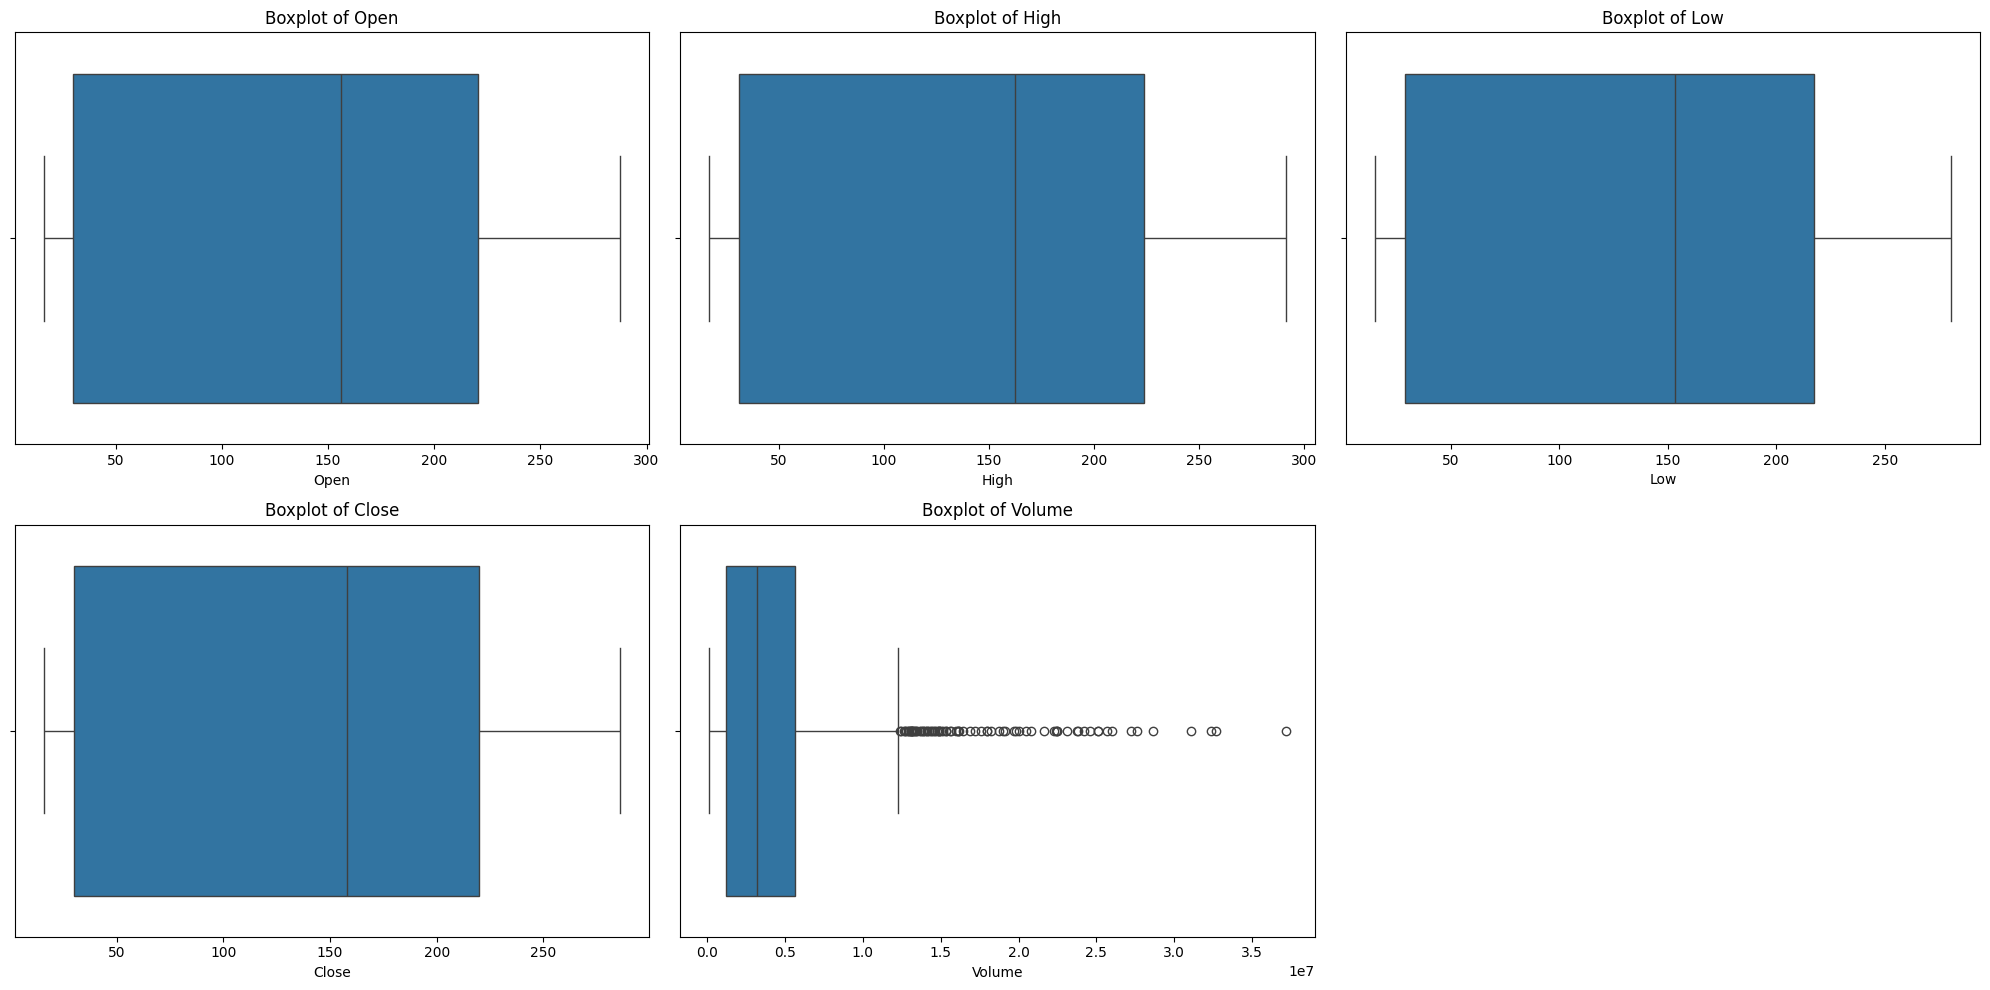

In [20]:
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.boxplot(x=tesla[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Observation:** The boxplots above reveal that only the Volume data contains outliers, while the other columns appear to be free of any outliers.

**Feature Engineering**:
Feature engineering involves creating new, meaningful features from existing ones. These additional features can significantly enhance model performance and provide deeper insights into the data.

In [21]:
splitted = tesla['Date'].str.split('/', expand=True)

tesla['day'] = splitted[1].astype('int')
tesla['month'] = splitted[0].astype('int')
tesla['year'] = splitted[2].astype('int')

In [22]:
tesla.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


**Observation:** We have now added three new columns—‘day’, ‘month’, and ‘year’—which were derived from the original ‘Date’ column provided in the dataset.

In [23]:
tesla['is_quarter_end'] = np.where(tesla['month']%3==0,1,0)

In [24]:
tesla.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


A quarter is defined as a three-month period, during which companies typically release their financial results, offering key insights into their performance. These quarterly reports can have a substantial impact on stock prices, as they are closely analyzed by investors and market participants. Given the potential influence of quarterly results on stock price movements, this feature has been added to the dataset. It is expected to contribute valuable information to the model, potentially enhancing its predictive capability.

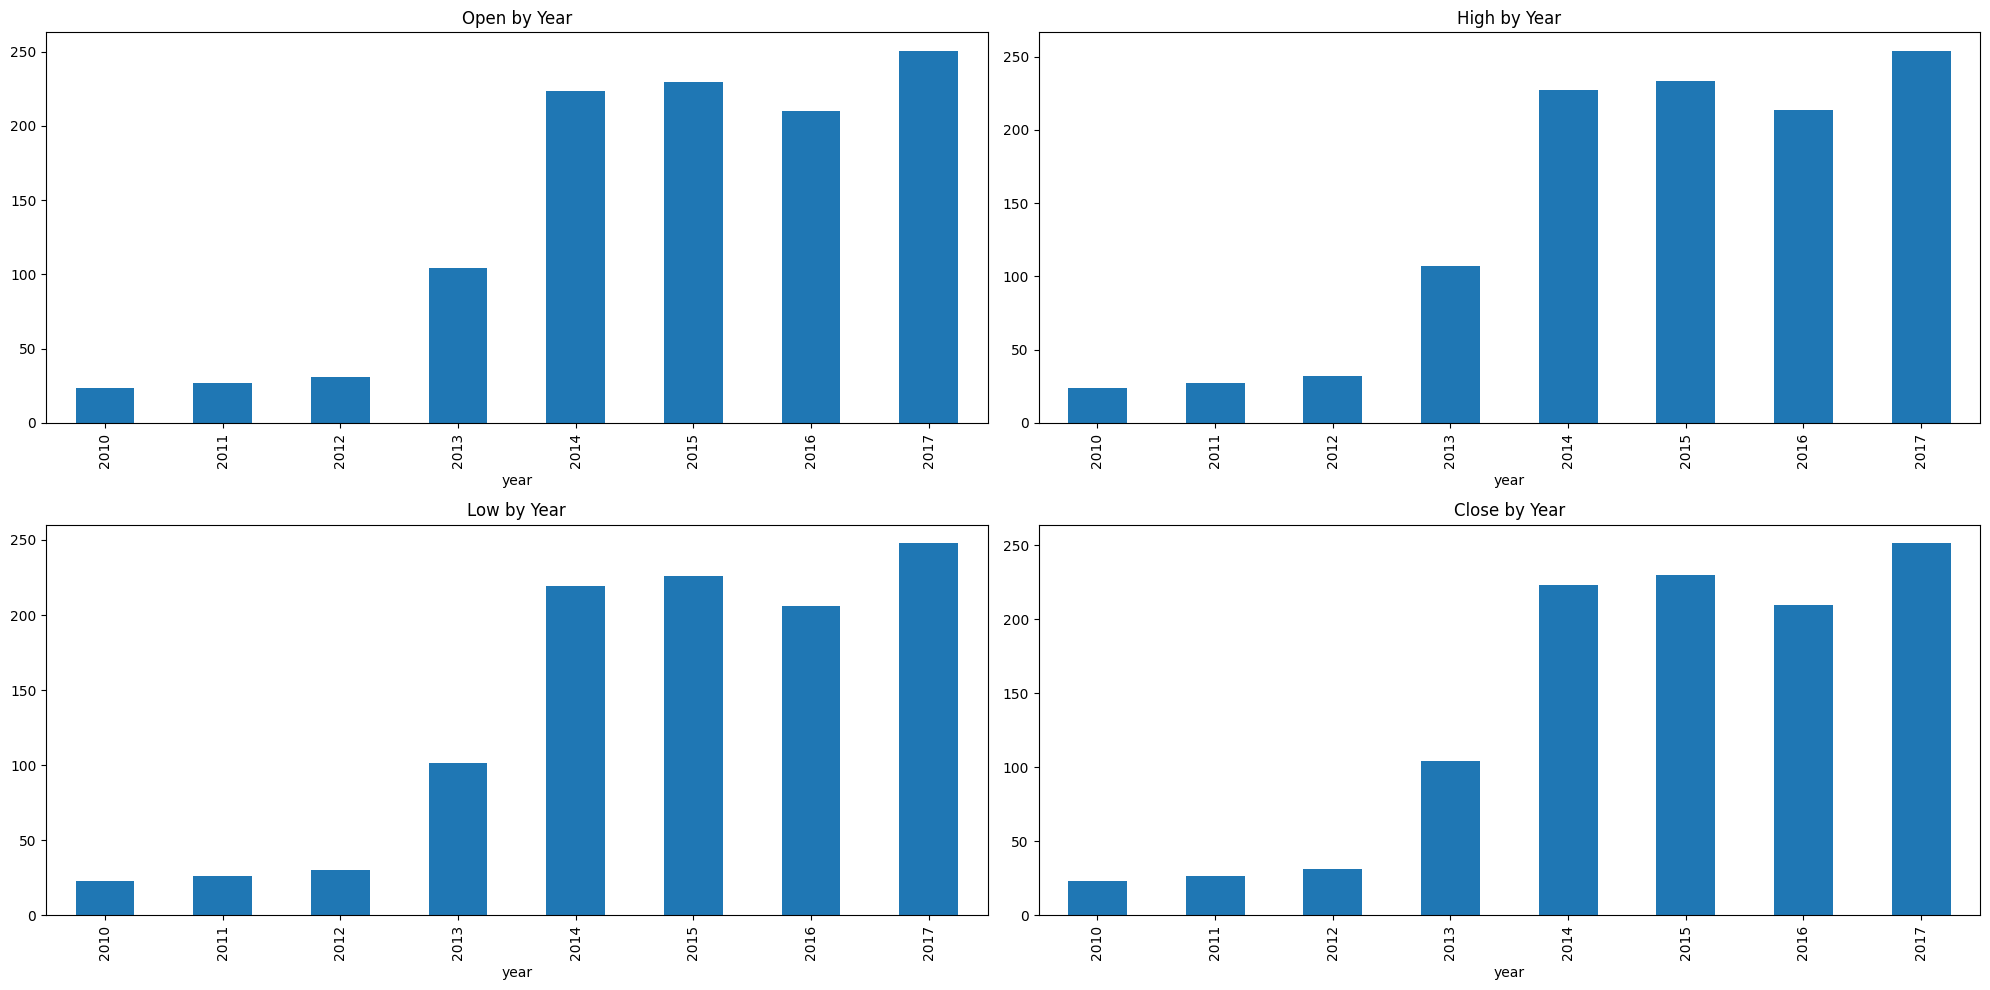

In [26]:
# Grouping the data by 'year' and compute the mean, excluding the 'Date' column
data_grouped = tesla.drop('Date', axis=1).groupby('year').mean()

# Setting up the plot with a larger figure size
plt.subplots(figsize=(20, 10))

# Looping through the columns and create a bar plot for each one
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot(kind='bar', title=f'{col} by Year')

    # Adjusting layout to prevent overlapping subplots
plt.tight_layout()

**Observation:** The bar charts above shows that stock prices have approximately doubled from 2013 to 2014.

In [27]:
tesla.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


**Observation:** Prices tend to be higher in quarter-end months compared to non-quarter-end months. However, trading volumes are lower during quarter-end months.

In [28]:
tesla['open-close']  = tesla['Open'] - tesla['Close']
tesla['low-high']  = tesla['Low'] - tesla['High']
tesla['target'] = np.where(tesla['Close'].shift(-1) > tesla['Close'], 1, 0)

Above, we have added several new columns (such as open-close and low-high) to assist in training our model, including the target feature, which indicates whether to buy or not. The model will be trained to predict this target. Before proceeding, let’s first check if the target is balanced by visualizing it with a pie chart.

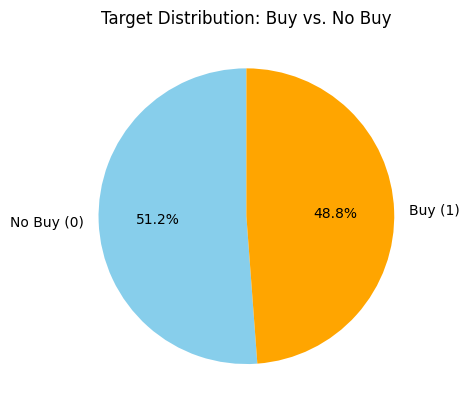

In [35]:
plt.pie(tesla['target'].value_counts(),
        labels=['No Buy (0)', 'Buy (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'orange'])

plt.title('Target Distribution: Buy vs. No Buy')
plt.show()

Text(0.5, 1.0, 'Heatmap of Highly Correlated Features (Correlation > 0.9)')

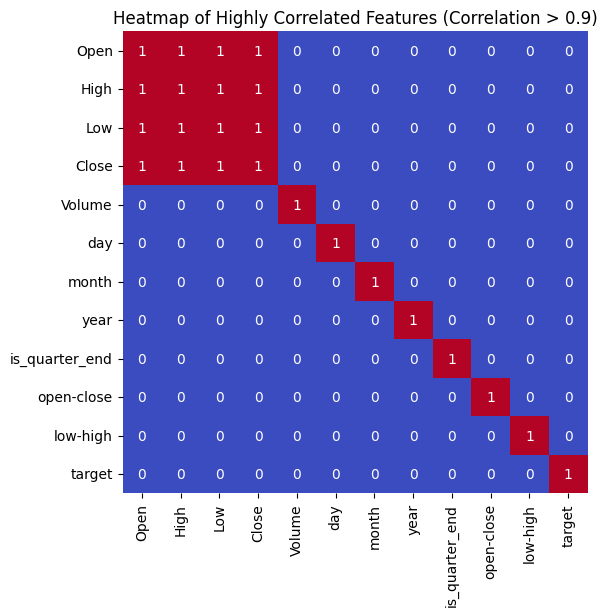

In [39]:
plt.figure(figsize=(6, 6))

# Focus on visualizing highly correlated features (correlation > 0.9)
sb.heatmap(tesla.drop('Date', axis=1).corr() > 0.9,
           annot=True,
           cbar=False,
           cmap='coolwarm')

plt.title('Heatmap of Highly Correlated Features (Correlation > 0.9)')

**Observation:** The heatmap above reveals a strong correlation between the OHLC features, which is expected. However, the newly added features show no significant correlations with each other or with the existing features. This indicates that multicollinearity is not a concern, allowing us to proceed with building the model.

**Data Splitting and Normalization**

In [40]:
# Selecting the features and target variable
features = tesla[['open-close', 'low-high', 'is_quarter_end']]
target = tesla['target']

In [41]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [42]:
# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features_scaled, target, test_size= 0.25, random_state=2022)

In [43]:
print(f'Training set shape: {X_train.shape}, Validation set shape: {X_valid.shape}')

Training set shape: (1269, 3), Validation set shape: (423, 3)


**Note:** After selecting the relevant features for model training, the data was normalized to promote stable and efficient model training. The dataset was then split into two subsets using a 75/25 ratio, allowing for the evaluation of the model's performance on unseen data.

**Model Development and Evaluation:**


In [44]:
lg_models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

In [46]:
for model in lg_models:
    model.fit(X_train, Y_train)

    training_accuracy = metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    validation_accuracy = metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1])

    print(f'{model.__class__.__name__}:')
    print(f'Training Accuracy: {training_accuracy:.4f}')
    print(f'Validation Accuracy: {validation_accuracy:.4f}')
    print()

LogisticRegression:
Training Accuracy: 0.5258
Validation Accuracy: 0.4980

SVC:
Training Accuracy: 0.4759
Validation Accuracy: 0.5128

XGBClassifier:
Training Accuracy: 0.9693
Validation Accuracy: 0.5237



Note: Among the three models trained, the XGBClassifier shows the highest performance. However, it appears to be prone to overfitting, as indicated by the significant gap between training and validation accuracy. In contrast, the Logistic Regression model does not exhibit this issue, suggesting it generalizes better.

To beeter understand the model's performance and evaluate its predictive accuracy, the confusion matrix is used for the validation data.





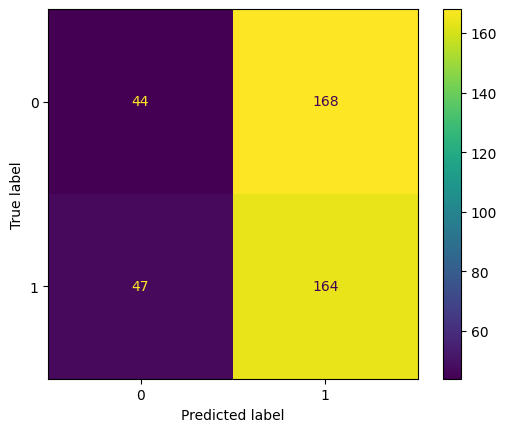

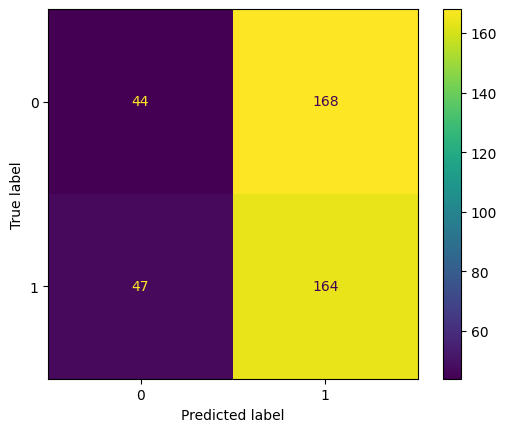

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display the confusion matrix for the first model (Logistic Regression)
cm_display = ConfusionMatrixDisplay.from_estimator(lg_models[0], X_valid, Y_valid)
cm_display.plot()

**Conclusion:** The accuracy achieved by the state-of-the-art ML model is no better than random guessing with a 50% probability. This could be attributed to several factors, including insufficient data or the use of an overly simplistic model for a complex task like stock market prediction.